**K-means** **Clustering**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch


In [2]:
# Load the dataset
df = pd.read_csv("/content/medical_cost.csv")

# Display basic dataset information
print("Dataset Head:\n", df.head())

Dataset Head:
    Id  age     sex     bmi  children smoker     region      charges
0   1   19  female  27.900         0    yes  southwest  16884.92400
1   2   18    male  33.770         1     no  southeast   1725.55230
2   3   28    male  33.000         3     no  southeast   4449.46200
3   4   33    male  22.705         0     no  northwest  21984.47061
4   5   32    male  28.880         0     no  northwest   3866.85520


In [9]:
# Encode categorical variables (sex, smoker, region)
categorical_columns = ['sex', 'smoker', 'region']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [10]:
# Select relevant features for clustering
features = ['age', 'bmi', 'children', 'smoker', 'region', 'charges']
X = df[features]

# Standardize the data (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# Elbow Method to Determine Optimal K
inertia = []  # List to store inertia values
K_range = range(1, 11)  # Trying K values from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
print(kmeans)

KMeans(n_clusters=10, n_init=10, random_state=42)


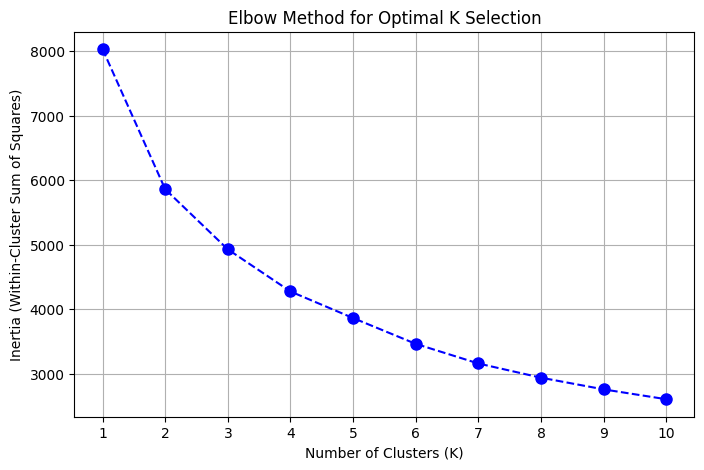

In [13]:

# Plot the Elbow Graph
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--', color='b', markersize=8)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K Selection")
plt.xticks(K_range)
plt.grid()
plt.show()

In [14]:
# We select the best K by manually checking the elbow plot
optimal_k = 3  # Change this based on the elbow point observed

# Apply K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

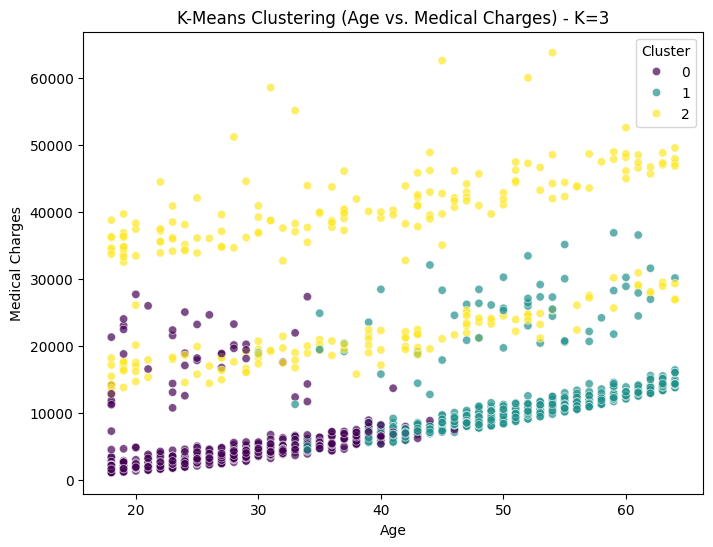

In [15]:
# Scatter plot of Age vs. Medical Charges
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['age'], y=df['charges'], hue=df['KMeans_Cluster'], palette="viridis", alpha=0.7)
plt.title(f"K-Means Clustering (Age vs. Medical Charges) - K={optimal_k}")
plt.xlabel("Age")
plt.ylabel("Medical Charges")
plt.legend(title="Cluster")
plt.show()

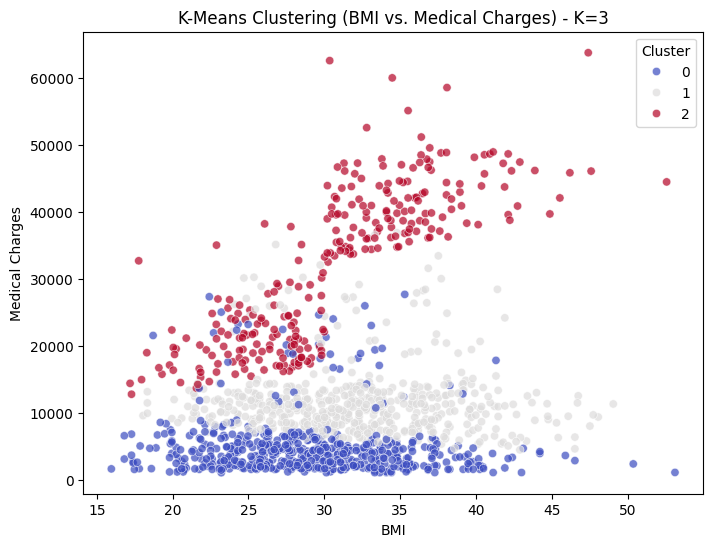

In [16]:
# Scatter plot of BMI vs. Medical Charges
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['bmi'], y=df['charges'], hue=df['KMeans_Cluster'], palette="coolwarm", alpha=0.7)
plt.title(f"K-Means Clustering (BMI vs. Medical Charges) - K={optimal_k}")
plt.xlabel("BMI")
plt.ylabel("Medical Charges")
plt.legend(title="Cluster")
plt.show()

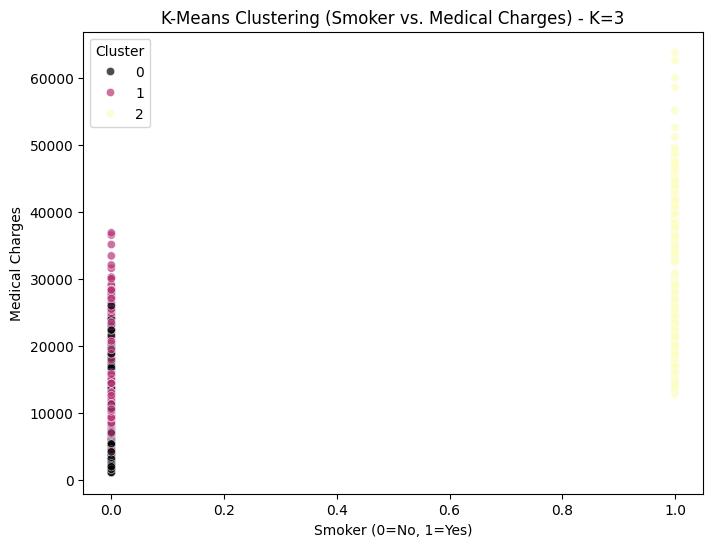

In [17]:
# Scatter plot of Smoker vs. Medical Charges
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['smoker'], y=df['charges'], hue=df['KMeans_Cluster'], palette="magma", alpha=0.7)
plt.title(f"K-Means Clustering (Smoker vs. Medical Charges) - K={optimal_k}")
plt.xlabel("Smoker (0=No, 1=Yes)")
plt.ylabel("Medical Charges")
plt.legend(title="Cluster")
plt.show()

In [18]:
# Evaluation

silhouette_kmeans = silhouette_score(X_scaled, df['KMeans_Cluster'])
print(f"K-Means Silhouette Score: {silhouette_kmeans:.3f}")

K-Means Silhouette Score: 0.216


**Agglomerative** **CLustering**

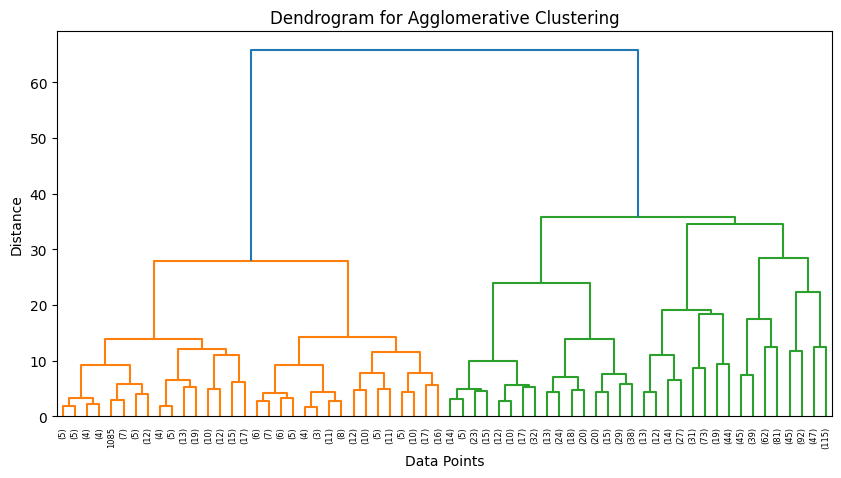

In [21]:
# -------------------------------
# Agglomerative Clustering
# -------------------------------

plt.figure(figsize=(10, 5))
linkage_matrix = sch.linkage(X_scaled, method='ward')  # Ward method minimizes variance
sch.dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title("Dendrogram for Agglomerative Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

In [23]:
optimal_k = 3  # Adjust based on the dendrogram
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
df['Agglo_Cluster'] = agg_clustering.fit_predict(X_scaled)

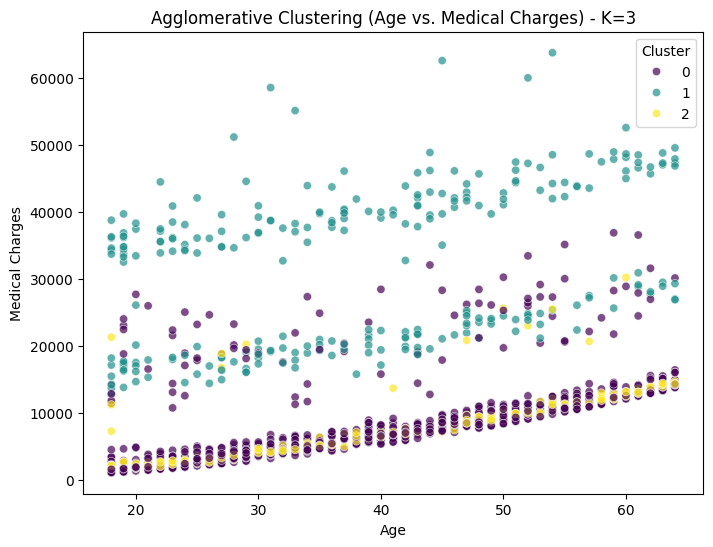

In [24]:
# Scatter plot of Age vs. Medical Charges
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['age'], y=df['charges'], hue=df['Agglo_Cluster'], palette="viridis", alpha=0.7)
plt.title(f"Agglomerative Clustering (Age vs. Medical Charges) - K={optimal_k}")
plt.xlabel("Age")
plt.ylabel("Medical Charges")
plt.legend(title="Cluster")
plt.show()

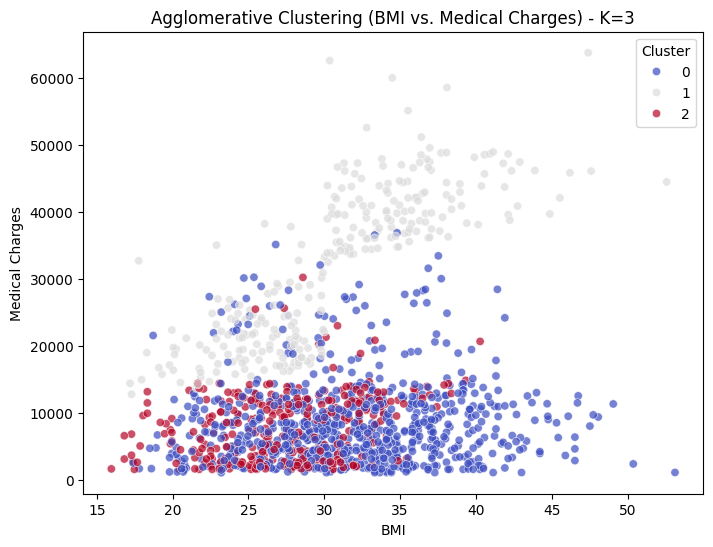

In [25]:
# Scatter plot of BMI vs. Medical Charges
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['bmi'], y=df['charges'], hue=df['Agglo_Cluster'], palette="coolwarm", alpha=0.7)
plt.title(f"Agglomerative Clustering (BMI vs. Medical Charges) - K={optimal_k}")
plt.xlabel("BMI")
plt.ylabel("Medical Charges")
plt.legend(title="Cluster")
plt.show()

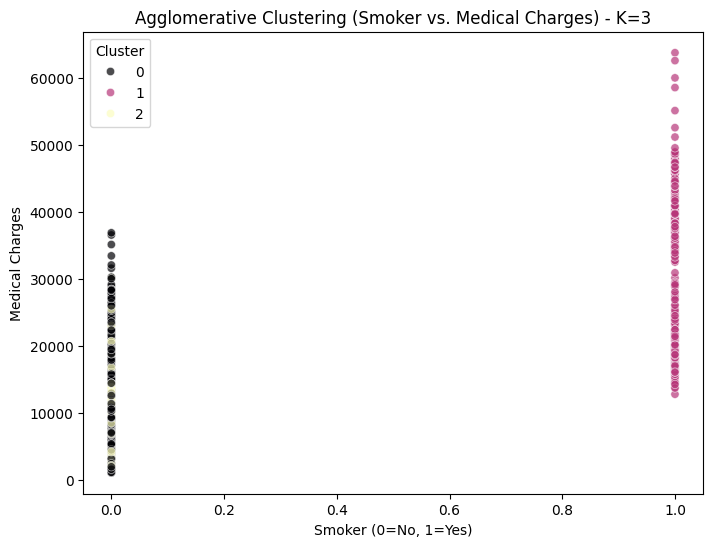

In [26]:
# Scatter plot of Smoker vs. Medical Charges
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['smoker'], y=df['charges'], hue=df['Agglo_Cluster'], palette="magma", alpha=0.7)
plt.title(f"Agglomerative Clustering (Smoker vs. Medical Charges) - K={optimal_k}")
plt.xlabel("Smoker (0=No, 1=Yes)")
plt.ylabel("Medical Charges")
plt.legend(title="Cluster")
plt.show()

In [27]:
# Compute silhouette scores
silhouette_agglo = silhouette_score(X_scaled, df['Agglo_Cluster'])
print(f"Agglomerative Clustering Silhouette Score: {silhouette_agglo:.3f}")

Agglomerative Clustering Silhouette Score: 0.165


In [28]:
silhouette_kmeans = silhouette_score(X_scaled, df['KMeans_Cluster'])
print(f"K-Means Silhouette Score: {silhouette_kmeans:.3f}")

# -------------------------------
# Conclusion
# -------------------------------
if silhouette_kmeans > silhouette_agglo:
    print("K-Means performed better based on Silhouette Score.")
else:
    print("Agglomerative Clustering performed better based on Silhouette Score.")

K-Means Silhouette Score: 0.216
K-Means performed better based on Silhouette Score.
